### Homework with openCV and Numpy  - 2022 0619 CJH
#### practice writing telemetry on images
---
* if you don't have it, get it with `pip install opencv-python` in a console, or `!pip install opencv-python` in a cell
* https://medium.com/@yukunpengba/comprehensive-python-opencv-tutorial-for-beginners-part-i-fd0293d52241
* color spaces: https://alloyui.com/examples/color-picker/hsv.html or http://colorizer.org/ or 

In [1]:
# !pip install opencv-python

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Differences between openCV and numpy - start manipulating at (125, 50)

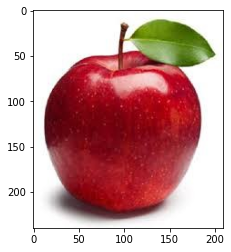

In [3]:
# Read the image as BGR but convert to RGB
img = cv2.cvtColor(cv2.imread('training_images/apple.jpeg'), cv2.COLOR_BGR2RGB)   
plt.imshow(img)   # Ploting the image using matplotlib

### openCV starts at the top left but locates based on (col, row).
* so it's thinking in (x,y) from the top left
* x increasing to the right, y increasing as you go down

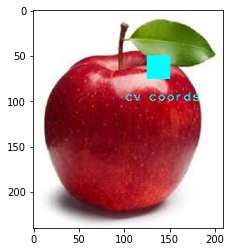

In [4]:
# use openCV to draw a cyan rectangle
rectangle_img = img.copy()
# start at (125, 50)  - x, y in the traditional sense starting at the top left
cv2.rectangle(rectangle_img, (125, 50), (150, 75), (0, 255, 255), -1)  # Rectangles: image, top left, bot right, color, thickness
# text arguments: img, text, location, font, scale, color, thickness, line type 
cv2.putText(rectangle_img,'cv coords', (100, 100), 1, 1, (0, 255, 255), 1, 1)
plt.imshow(rectangle_img)

### numpy also starts at the top left but references (row, col) 
#### now you have to think thinking in (y,x) from the top left

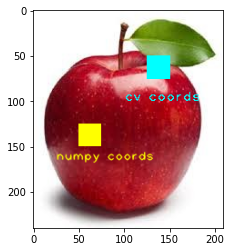

In [5]:
# make a yellow rectangle with numpy
rectangle_img[125:150,50:75,:] = np.array([255,255,0], dtype=np.uint8)
cv2.putText(rectangle_img,'numpy coords', (25, 165), 1, 0.9, (255, 255, 0), 1, cv2.LINE_AA)
plt.imshow(rectangle_img)

---
### Exercise 1 - writing real information on images
#### every function you need should already have been used above or in the lecture
* copy the original image
* make a circle around the top of the apple's stem in magenta with cv2.circle
  * note the cv2 drawing functions change the input image
* make a black box in the **top left** of the image with **cv2.rectangle**
  * they get filled in if you use a -1 for the thickness
* write "cv stem:" in the box in white  with cv2.text
* and then after write in red the location of center of the circle you drew
* hint: do it in that order because the text needs to write over the black box

### Exercise 2 - writing more data on the image
* keep using that image
* make a box around the edges of the apple in green using cv2.rectangle
* make a black box in the **bottom right** of the image with **numpy**
* in the new black box in white with cv2.text
  * write "box top left:" and the x,y coords of your box top left
  * and then under that write "box bottom right:" and the x,y coords of your box bottom right


---
### Which is faster, numpy or openCV?

In [6]:
%%timeit
rectangle_img[125:150,50:75,:] = np.array([255,255,0], dtype=np.uint8)

5.52 µs ± 274 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [7]:
%%timeit
cv2.rectangle(rectangle_img, (125, 50), (150, 75), (0, 255, 255), -1) 

2.8 µs ± 293 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
